# CREDIT SCORE CLASSIFICATION

***Problem Statement***: Given a person’s credit-related information, build a machine learning model that can classify the credit score.

### Dataset description

**ID**: Represents a unique identification of an entry

**Customer_ID**: Represents a unique identification of a person

**Month**: Represents the month of the year

**Name**: Represents the name of a person

**Age**: Represents the age of the person

**SSN**: Represents the social security number of a person

**Occupation**: Represents the occupation of the person

**Annual_Income**: Represents the annual income of the person

**Monthly_Inhand_Salary**: Represents the monthly base salary of a person

**Num_Bank_Accounts**: Represents the number of bank accounts a person holds

**Num_Credit_Card**: Represents the number of other credit cards held by a person

**Interest_Rate**: Represents the interest rate on credit card

**Num_of_Loan**: Represents the number of loans taken from the bank

**Type_of_Loan**: Represents the types of loan taken by a person

**Delay_from_due_date**: Represents the average number of days delayed from the payment date

**Num_of_Delayed_Payment**: Represents the average number of payments delayed by a person

**Changed_Credit_Limit**: Represents the percentage change in credit card limit

**Num_Credit_Inquiries**: Represents the number of credit card inquiries

**Credit_Mix**: Represents the classification of the mix of credits

**Outstanding_Debt**: Represents the remaining debt to be paid 

**Credit_Utilization_Ratio**: Represents the utilization ratio of credit card

**Credit_History_Age**: Represents the age of credit history of the person

**Payment_of_Min_Amount**: Represents whether only the minimum amount was paid by the person

**Total_EMI_per_month**: Represents the monthly EMI payments 

**Amount_invested_monthly**: Represents the monthly amount invested by the customer 

**Payment_Behaviour**: Represents the payment behavior of the customer 

**Monthly_Balance**: Represents the monthly balance amount of the customer

**Credit_Score**: Represents the credit score of the customer (Poor, Standard, Good)

### Import required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.feature_selection import mutual_info_classif 
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from imblearn.over_sampling import RandomOverSampler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings("ignore")

### Read the dataset into python environment

In [2]:
df=pd.read_csv(r"C:\Users\aksmk\OneDrive\Desktop\Internship\credit.csv")
pd.set_option('display.max_columns',None)
df.head(3)

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,5634,3392,1,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,26.822620,265.0,No,49.574949,21.46538,High_spent_Small_value_payments,312.494089,Good
1,5635,3392,2,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,4.0,11.27,4.0,Good,809.98,31.944960,266.0,No,49.574949,21.46538,Low_spent_Large_value_payments,284.629162,Good
2,5636,3392,3,Aaron Maashoh,23.0,821000265.0,Scientist,19114.12,1824.843333,3.0,4.0,3.0,4.0,"Auto Loan, Credit-Builder Loan, Personal Loan,...",3.0,7.0,11.27,4.0,Good,809.98,28.609352,267.0,No,49.574949,21.46538,Low_spent_Medium_value_payments,331.209863,Good


# Exploratory Data Analysis (EDA), Pre - Processing and 
# Feature Engineering

### Check basic information

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  int64  
 1   Customer_ID               100000 non-null  int64  
 2   Month                     100000 non-null  int64  
 3   Name                      100000 non-null  object 
 4   Age                       100000 non-null  float64
 5   SSN                       100000 non-null  float64
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  float64
 8   Monthly_Inhand_Salary     100000 non-null  float64
 9   Num_Bank_Accounts         100000 non-null  float64
 10  Num_Credit_Card           100000 non-null  float64
 11  Interest_Rate             100000 non-null  float64
 12  Num_of_Loan               100000 non-null  float64
 13  Type_of_Loan              100000 non-null  ob

***Dataset has 28 features and 100000 entries. Among that, 21 features are numerical (18 float and 3 integer) and 7 are categorical features.***

### Check for duplicates

In [4]:
df.duplicated().sum()

0

***There are no duplicate entries in the dataset.***

### Check for null values 

In [5]:
df.isnull().sum()

ID                          0
Customer_ID                 0
Month                       0
Name                        0
Age                         0
SSN                         0
Occupation                  0
Annual_Income               0
Monthly_Inhand_Salary       0
Num_Bank_Accounts           0
Num_Credit_Card             0
Interest_Rate               0
Num_of_Loan                 0
Type_of_Loan                0
Delay_from_due_date         0
Num_of_Delayed_Payment      0
Changed_Credit_Limit        0
Num_Credit_Inquiries        0
Credit_Mix                  0
Outstanding_Debt            0
Credit_Utilization_Ratio    0
Credit_History_Age          0
Payment_of_Min_Amount       0
Total_EMI_per_month         0
Amount_invested_monthly     0
Payment_Behaviour           0
Monthly_Balance             0
Credit_Score                0
dtype: int64

***There are no null values present in the dataset.***

### Check for unique values

In [6]:
(df.nunique()).sort_values(ascending=False)

ID                          100000
Credit_Utilization_Ratio    100000
Monthly_Balance              98494
Monthly_Inhand_Salary        13241
Customer_ID                  12500
SSN                          12500
Annual_Income                12488
Amount_invested_monthly      12261
Outstanding_Debt             12203
Total_EMI_per_month          11890
Name                         10128
Type_of_Loan                  6261
Changed_Credit_Limit          3452
Credit_History_Age             404
Delay_from_due_date             63
Age                             43
Interest_Rate                   34
Num_of_Delayed_Payment          26
Num_Credit_Inquiries            18
Occupation                      15
Num_Credit_Card                 12
Num_Bank_Accounts               12
Num_of_Loan                     10
Month                            8
Payment_Behaviour                6
Credit_Mix                       3
Payment_of_Min_Amount            3
Credit_Score                     3
dtype: int64

***Features 'ID' and 'Credit_Utilization_Ratio' have full of unique values. Also there are 12500 unique customers and each customer has a unique 'SSN' (Social Security Number). So we can drop these un necessary features by assuming they don’t have any predictive power to predict the target variable.***

In [7]:
df.drop(['ID','Customer_ID','Name','SSN','Type_of_Loan','Credit_Utilization_Ratio'],axis=1,inplace=True)

### Check for outliers

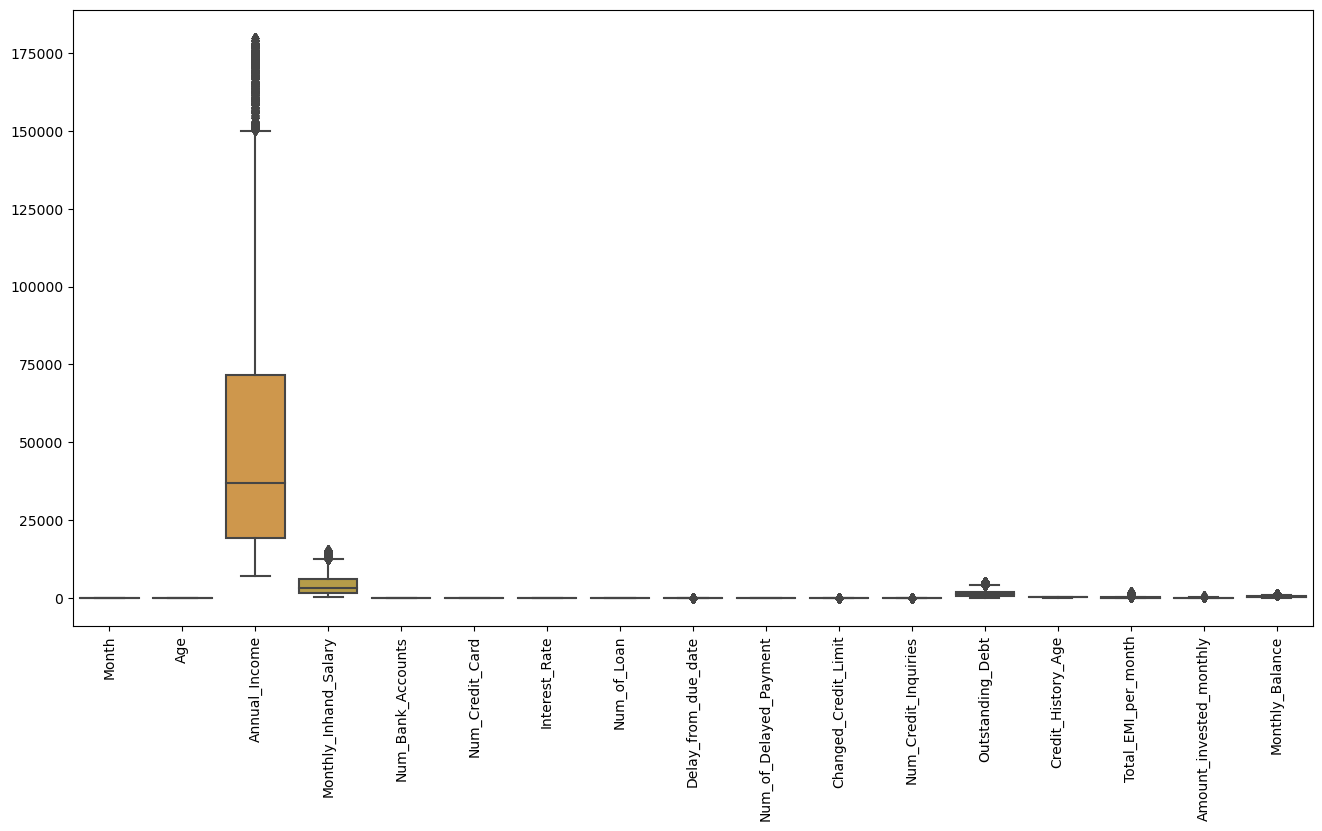

In [8]:
plt.figure(figsize=(16, 8))
sns.boxplot(df)
plt.xticks(rotation=90)
plt.show()

***Inference : Outliers are present in 10 no. of features.***

In [9]:
outlier_columns=['Annual_Income','Monthly_Inhand_Salary','Delay_from_due_date','Changed_Credit_Limit','Outstanding_Debt','Total_EMI_per_month','Amount_invested_monthly','Monthly_Balance']

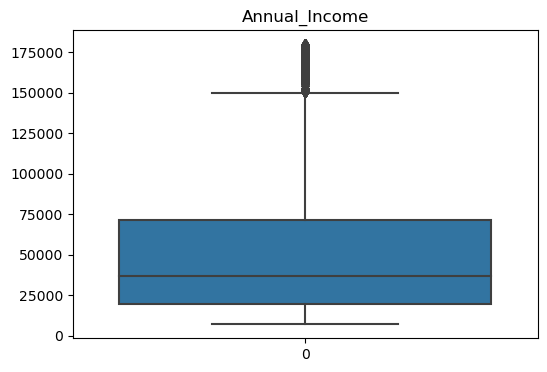

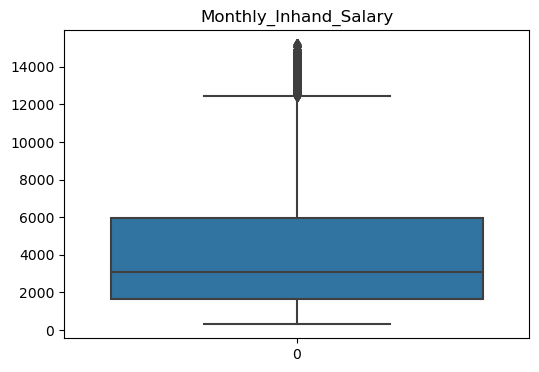

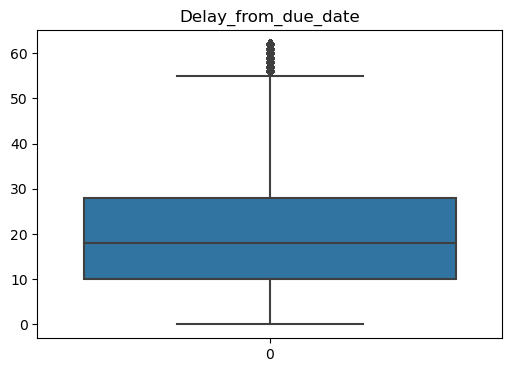

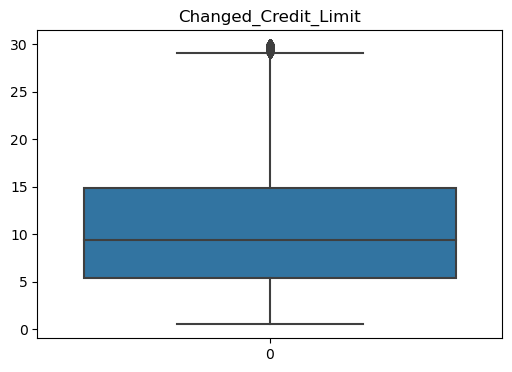

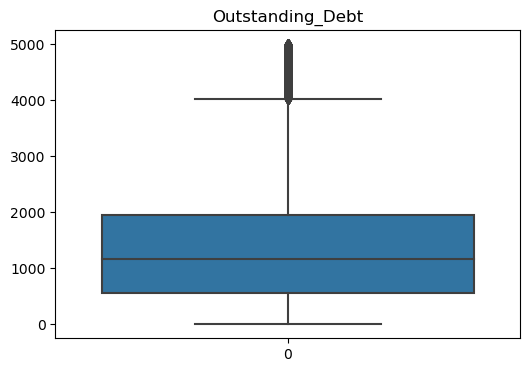

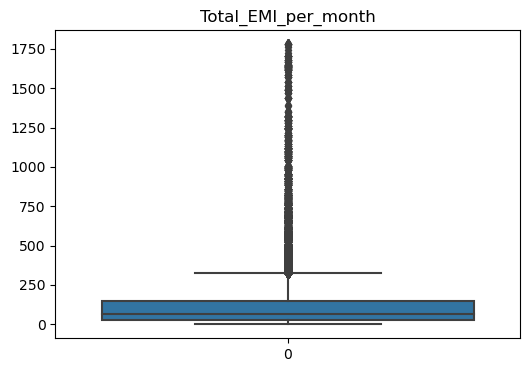

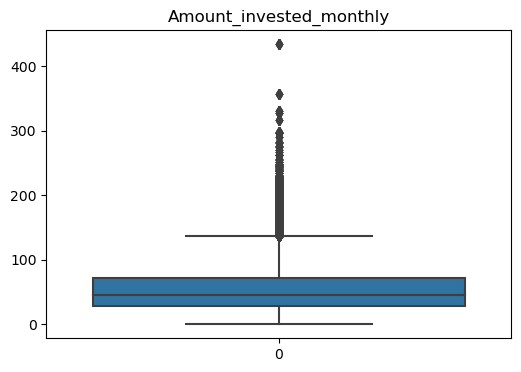

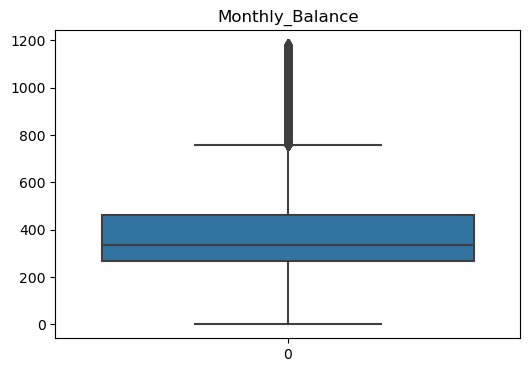

In [10]:
for i in outlier_columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(df[i])
    plt.title(i)
    plt.show()

***Inference : In every 10 features, outliers are seen above upper fence only (high outliers) and also they all are genuine outliers. So keep outliers without treatment and use outlier insensitive algorithms for modelling.***

### Check statistical summary

In [11]:
df.describe()

,Month,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_History_Age,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,4.500000,33.316340,50505.123449,4197.270835,5.368820,5.533570,14.53208,3.532880,21.08141,13.313120,10.470323,5.798250,1426.220376,221.220460,107.699208,55.101315,392.697586
std,2.291299,10.764812,38299.422093,3186.432497,2.593314,2.067098,8.74133,2.446356,14.80456,6.237166,6.609481,3.867826,1155.129026,99.680716,132.267056,39.006932,201.652719
min,1.000000,14.000000,7005.930000,303.645417,0.000000,0.000000,1.00000,0.000000,0.00000,0.000000,0.500000,0.000000,0.230000,1.000000,0.000000,0.000000,0.007760
25%,2.750000,24.000000,19342.972500,1626.594167,3.000000,4.000000,7.00000,2.000000,10.00000,9.000000,5.380000,3.000000,566.072500,144.000000,29.268886,27.959111,267.615983
50%,4.500000,33.000000,36999.705000,3095.905000,5.000000,5.000000,13.00000,3.000000,18.00000,14.000000,9.400000,5.000000,1166.155000,219.000000,66.462304,45.156550,333.865366
75%,6.250000,42.000000,71683.470000,5957.715000,7.000000,7.000000,20.00000,5.000000,28.00000,18.000000,14.850000,8.000000,1945.962500,302.000000,147.392573,71.295797,463.215683
max,8.000000,56.000000,179987.280000,15204.633333,11.000000,11.000000,34.00000,9.000000,62.00000,25.000000,29.980000,17.000000,4998.070000,404.000000,1779.103254,434.191089,1183.930696


### Distribution of features

Add percentages on top of bars

In [12]:
def percentage_with_hue(plot, feature, Number_of_categories, hue_categories, x_pos=0, y_pos=0, fontsize = 12):
    '''
    This function prints percentage of a barplot when plotted with hue.
    '''
    # get the height of each bar
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    for i in range(Number_of_categories):
        total = feature.value_counts().values[i]
        for j in range(hue_categories):
            # calculate percentage of the category
            percentage = '{:.2f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            # set the x and y position of the percentage value to look good
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 + x_pos
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() + y_pos
            ax.annotate(percentage, (x, y), fontsize = fontsize)
    
def percentage_without_hue(ax, feature, x_pos=0, y_pos=0, fontsize = 12 ):
    '''
    This function prints percentage of a barplot when plotted without hue.
    '''
    total = len(feature)
    for p in ax.patches:
        # calculate percentage of the category
        percentage = '{:.2f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width()/2 + x_pos # To adjust the position of the percentage value
        y = p.get_y() + p.get_height() + y_pos # To adjust the position of the percentage value
        ax.annotate(percentage, (x, y),ha='center', size = fontsize)

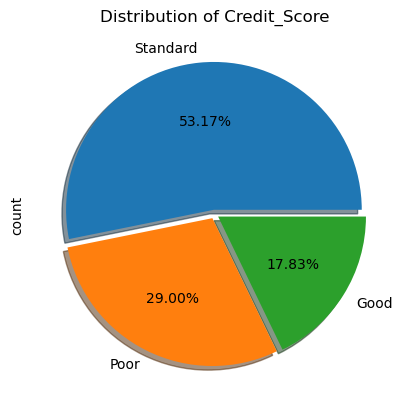

In [13]:
df["Credit_Score"].value_counts().plot.pie(explode = [0.03,0.03,0.03], autopct="%1.2f%%",shadow = True,labels = ["Standard","Poor","Good"])
plt.title('Distribution of Credit_Score')
plt.show()

***Inference : Data is imbalanced. Majority of customers have 'Standard' credit score while a small number of customers have 'Good' credit score.***

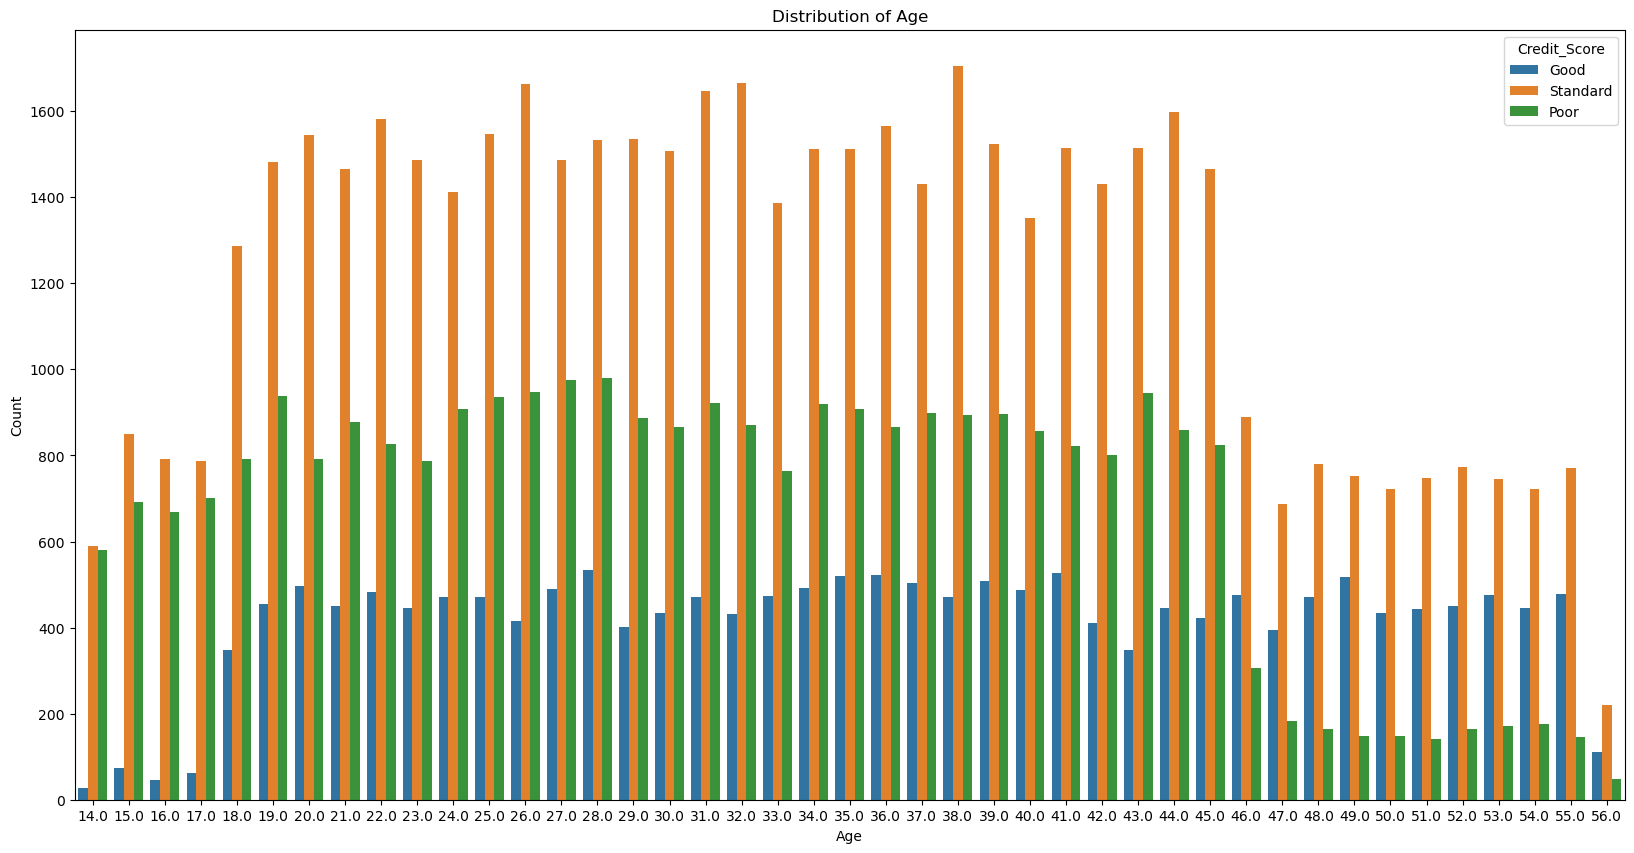

In [14]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='Age',data=df,hue='Credit_Score')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

***Inference : Middle aged customers are more in number compared to young and old aged customers. Among old people, very few percentage have 'Poor' credit score whereas the customers with age less than 46 have more percentage of 'Poor' credit score. So, the two age groups have a clear pattern of 'Credit Score'. So divide it into 2 groups(upto 45 and above 45) and drop the original 'Age' column.***

In [15]:
df['Age_Group']=df['Age'].apply(lambda x:0 if x<46 else 1)
df.drop('Age',axis=1,inplace=True)

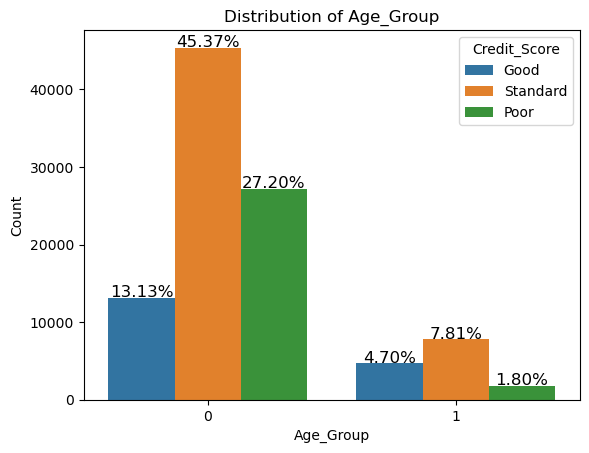

In [16]:
ax=sns.countplot(x='Age_Group',data=df,hue='Credit_Score')
plt.title('Distribution of Age_Group')
plt.xlabel('Age_Group')
plt.ylabel('Count')
percentage_without_hue(ax, df['Age_Group'], 0,80,12)
plt.show()

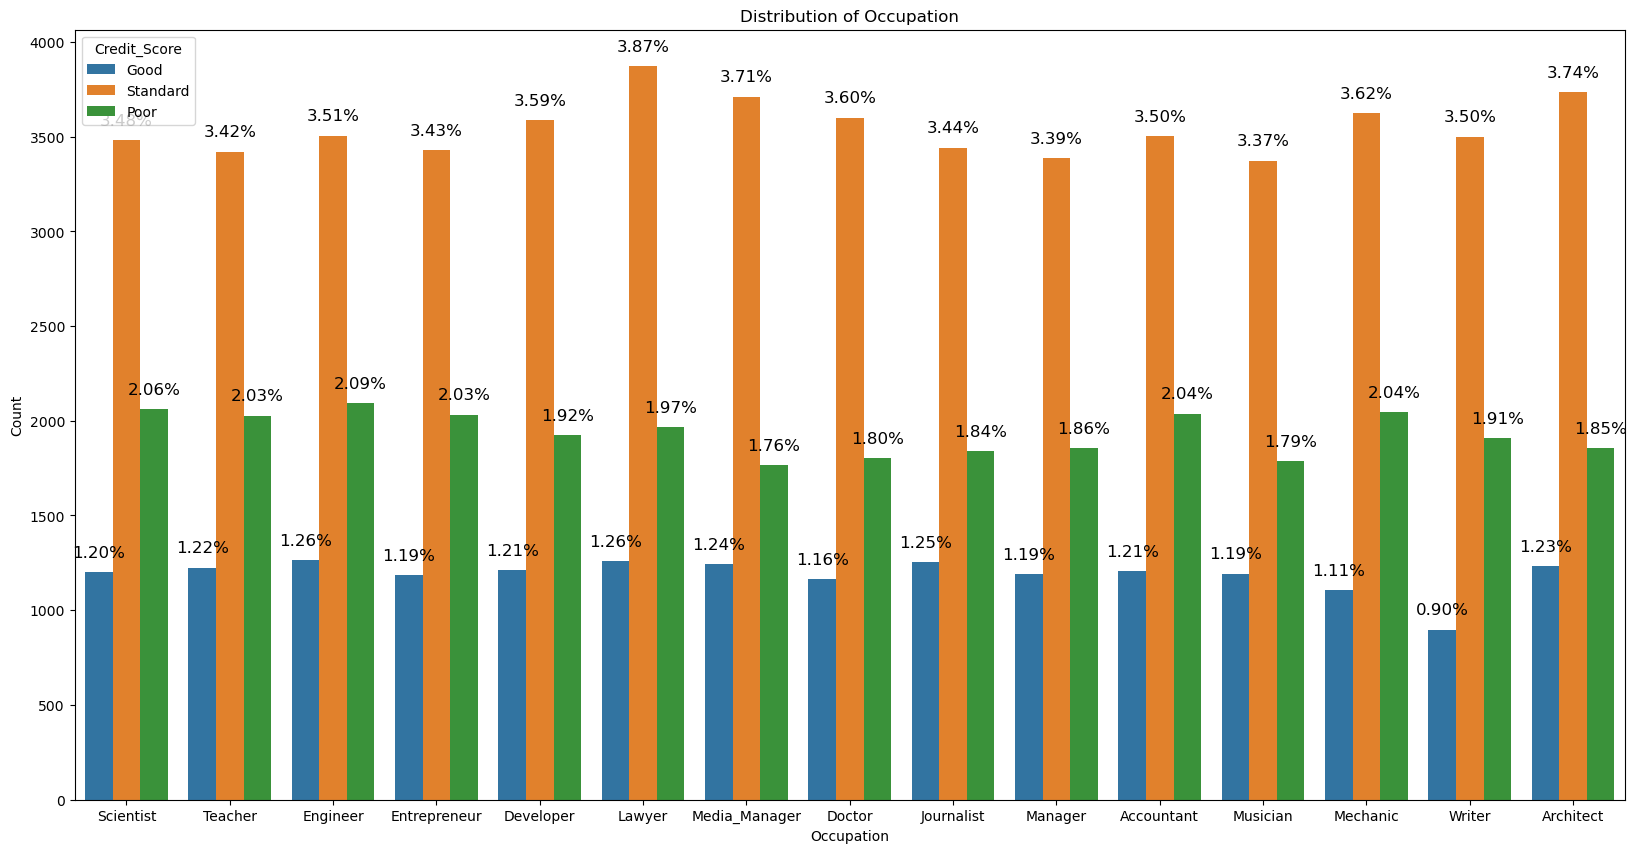

In [17]:
plt.figure(figsize=(20, 10))
ax=sns.countplot(x='Occupation',data=df,hue='Credit_Score')
plt.title('Distribution of Occupation')
plt.xlabel('Occupation')
plt.ylabel('Count')
percentage_without_hue(ax, df['Occupation'], 0,80,12)
plt.show()

***Inference : Among all the occupations, all the three credit scores are almost equally distributed. So we can drop it.***

In [18]:
df.drop('Occupation',axis=1,inplace=True)

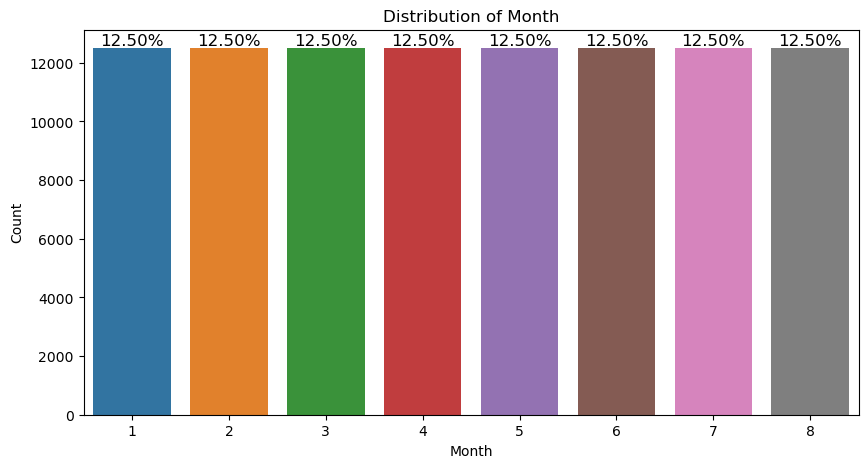

In [19]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Month',data=df)
plt.title('Distribution of Month')
plt.xlabel('Month')
plt.ylabel('Count')
percentage_without_hue(ax, df['Month'], 0,80,12)
plt.show()

***Inference : Data is uniformly distributed across all the 8 months. i.e., Every 8 month has equal number of entries. Since it does not contribute to predict our target, drop it.***

In [20]:
df.drop('Month',axis=1,inplace=True)

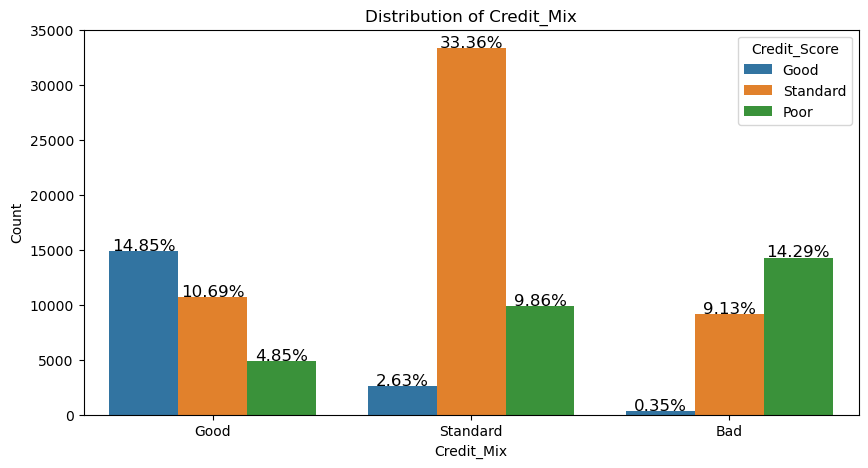

In [21]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Credit_Mix',data=df,hue='Credit_Score')
plt.title('Distribution of Credit_Mix')
plt.xlabel('Credit_Mix')
plt.ylabel('Count')
percentage_without_hue(ax, df['Credit_Mix'], 0,80,12)
plt.show()

***Inference : In the case of customers with Good 'Credit_Mix', percentage of Good 'Credit_Score' is more and similarly for others too.***

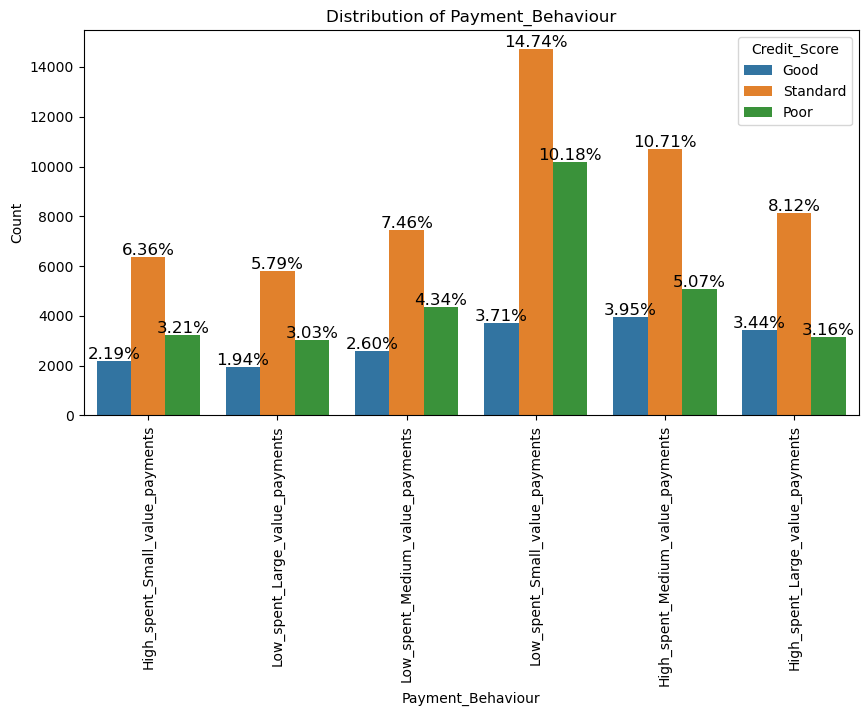

In [22]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Payment_Behaviour',data=df,hue='Credit_Score')
plt.title('Distribution of Payment_Behaviour')
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
percentage_without_hue(ax, df['Payment_Behaviour'], 0,80,12)
plt.xticks(rotation=90)
plt.show()

***Inference : Among five payment behaviours, 'Standard' credit score percentage is highest and 'Good' pecentage is the least. Where as in 'High_spent_Large_value_payments' 'Standard' comes first, then 'Good' and at last 'Poor'.***

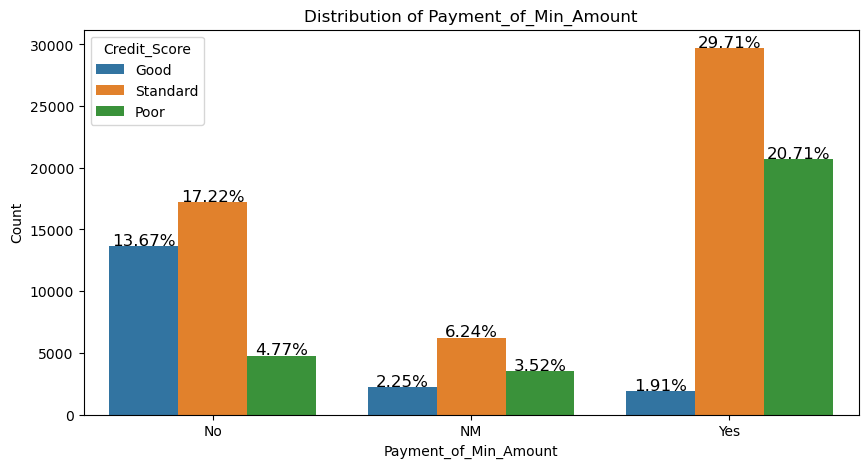

In [23]:
plt.figure(figsize=(10, 5))
ax=sns.countplot(x='Payment_of_Min_Amount',data=df,hue='Credit_Score')
plt.title('Distribution of Payment_of_Min_Amount')
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
percentage_without_hue(ax, df['Payment_of_Min_Amount'], 0,80,12)
plt.show()

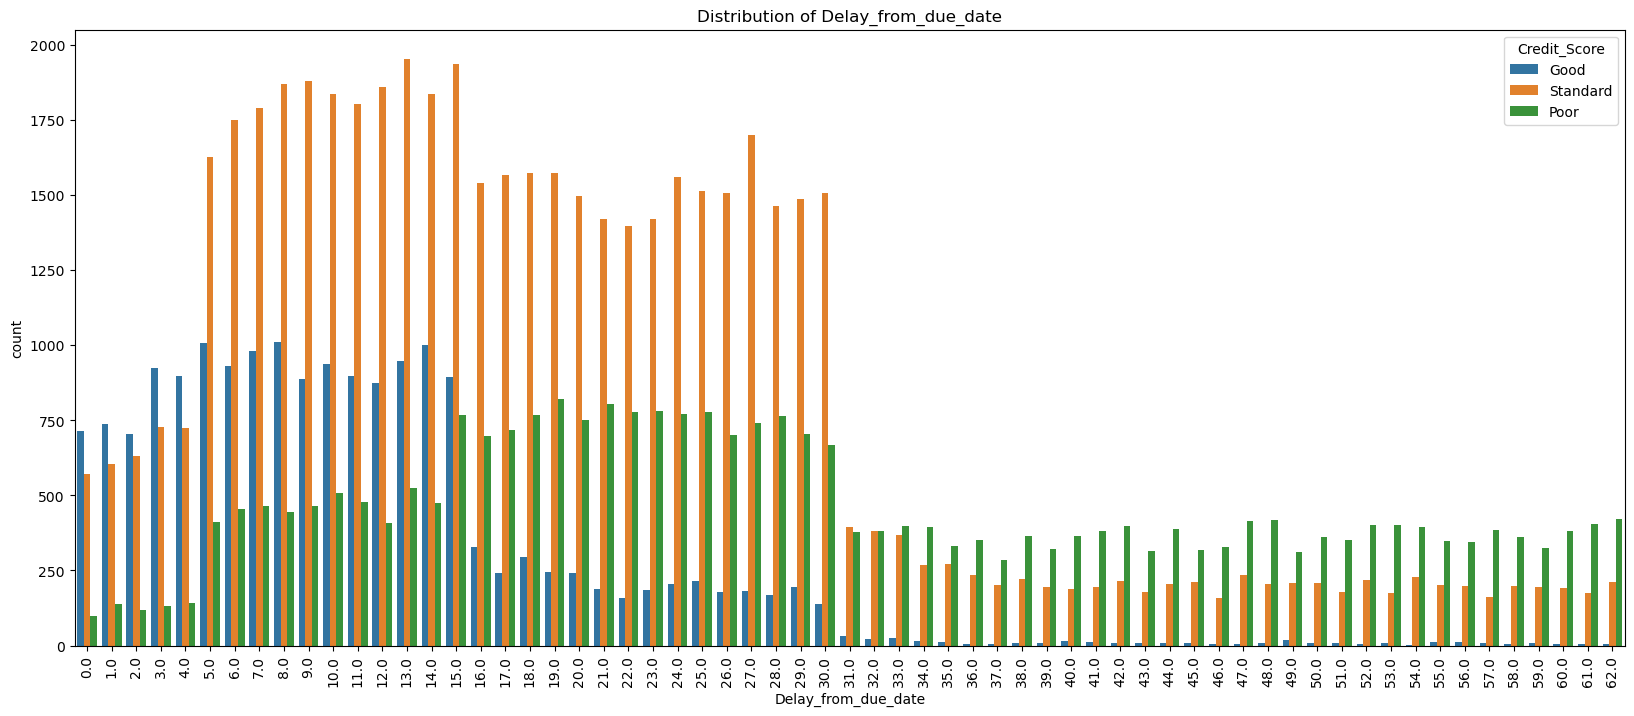

In [24]:
plt.figure(figsize=(20, 8))
plt.title('Distribution of Delay_from_due_date')
sns.countplot(x='Delay_from_due_date',data=df,hue='Credit_Score')
plt.xticks(rotation=90)
plt.show()

***Inference : When 'Delay_from_due_date' is low, 'Good' credit score percentage is more than other two whereas when 'Delay_from_due_date' is high 'Poor' credit score percentage is more than other two. So we can divide it into 3 groups - 0-4, 5-30 and 31-62 and drop original column.***

In [25]:
df['Delay_from_due_date_Group']=df['Delay_from_due_date'].apply(lambda x:0 if x<5 else 1 if 5<=x<=30 else 2)
df.drop('Delay_from_due_date',axis=1,inplace=True)

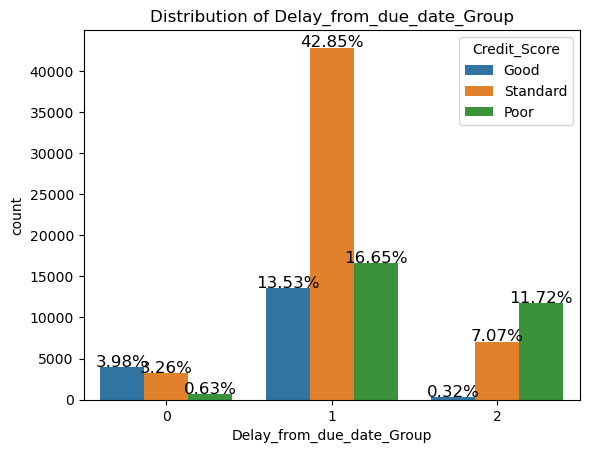

In [26]:
plt.title('Distribution of Delay_from_due_date_Group')
ax=sns.countplot(x='Delay_from_due_date_Group',data=df,hue='Credit_Score')
percentage_without_hue(ax, df['Delay_from_due_date_Group'], 0,80,12)
plt.show()

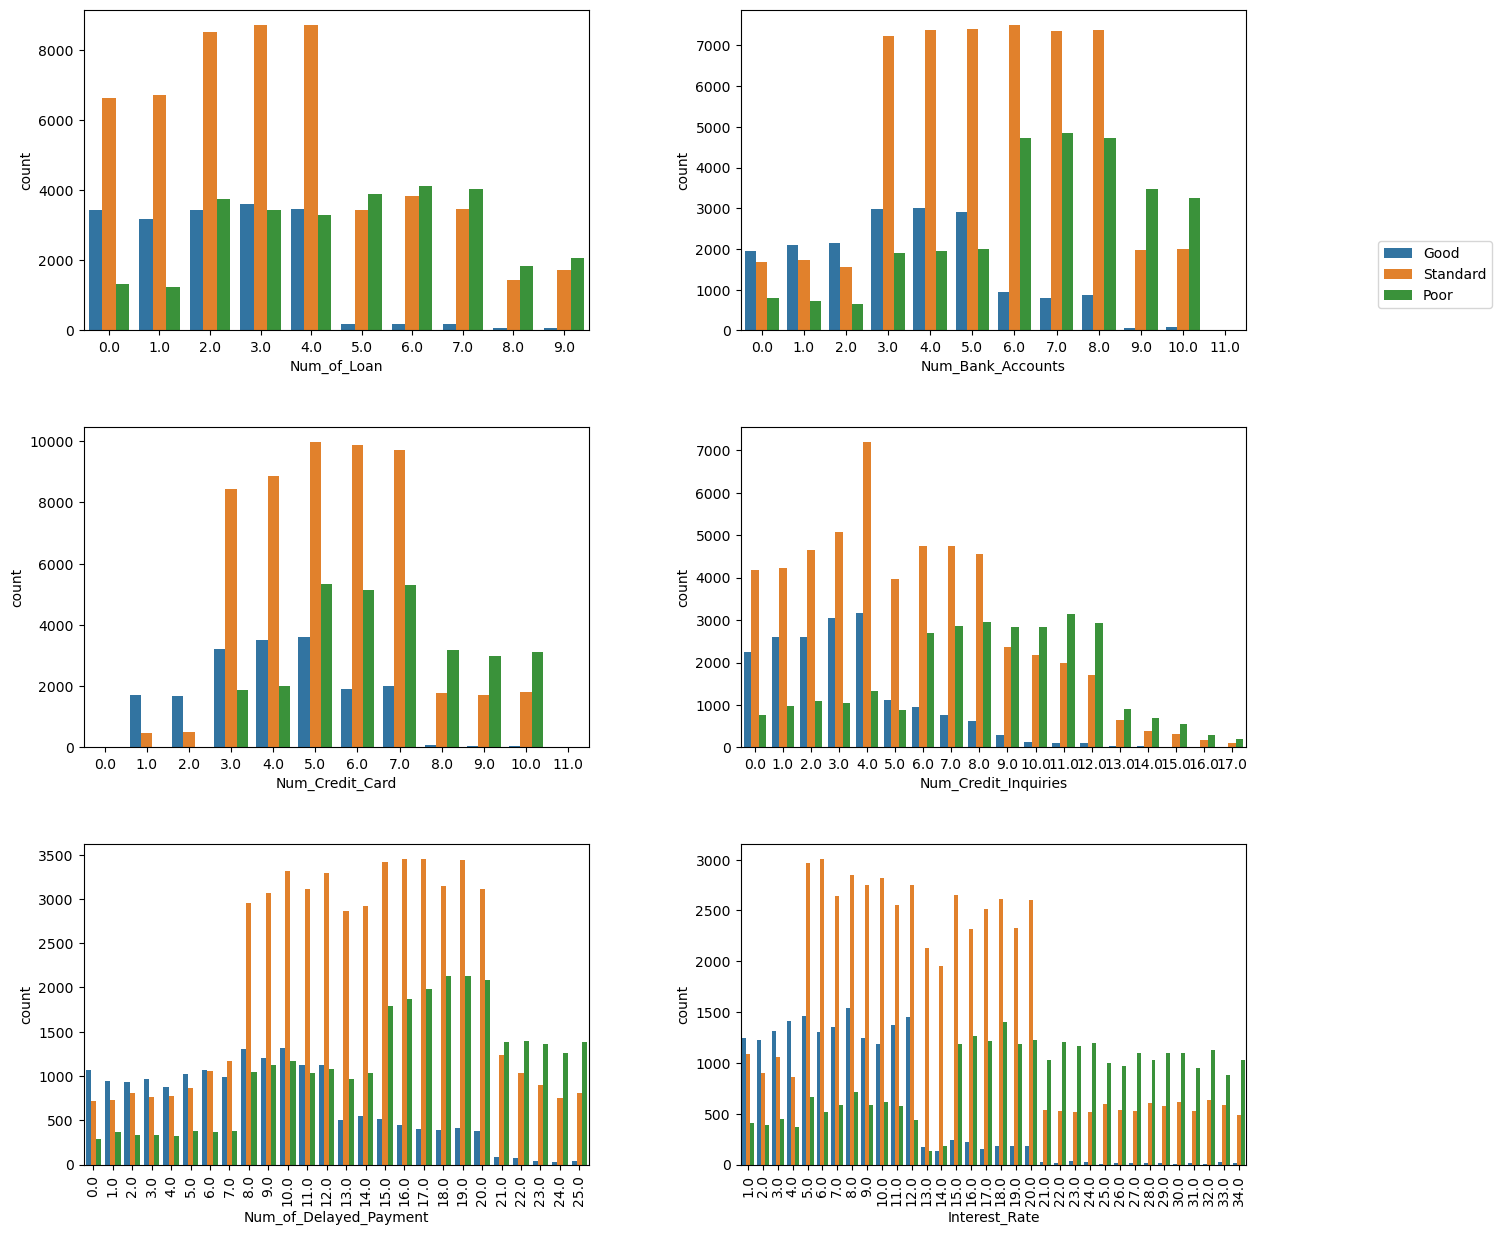

In [27]:
fig,axes = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot(x='Num_of_Loan',data=df,ax=axes[0,0],hue='Credit_Score')
sns.countplot(x='Num_Bank_Accounts',data=df,ax=axes[0,1],hue='Credit_Score')
sns.countplot(x='Num_Credit_Card',data=df,ax=axes[1,0],hue='Credit_Score')
sns.countplot(x='Num_Credit_Inquiries',data=df,ax=axes[1,1],hue='Credit_Score')
sns.countplot(x='Num_of_Delayed_Payment',data=df,ax=axes[2,0],hue='Credit_Score')
sns.countplot(x='Interest_Rate',data=df,ax=axes[2,1],hue='Credit_Score')
axes[0,1].legend(bbox_to_anchor=(1.5, 0.3), loc='upper right')
axes[0,0].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
axes[2,0].get_legend().remove()
axes[2,1].get_legend().remove()
plt.sca(axes[2, 0])
plt.xticks(rotation=90)
plt.sca(axes[2, 1])
plt.xticks(rotation=90)
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference : As number of loans, bank accounts, credit cards, credit inquiries, delayed payment and rate of interest increases, number of 'Poor' credit score is more than other two credit scores. So we can split all these features into different groups and drop original ones.***

In [28]:
df['Num_of_Loan_Group']=df['Num_of_Loan'].apply(lambda x:0 if x<5 else 1)
df.drop('Num_of_Loan',axis=1,inplace=True)

In [29]:
df['Num_Bank_Accounts_Group']=df['Num_Bank_Accounts'].apply(lambda x:0 if x<3 else 1 if 3<=x<=5 else 2)
df.drop('Num_Bank_Accounts',axis=1,inplace=True)

In [30]:
df['Num_Credit_Card_Group']=df['Num_Credit_Card'].apply(lambda x:0 if x<3 else 1 if 3<=x<=4 else 2 if 5<=x<=7 else 3 )
df.drop('Num_Credit_Card',axis=1,inplace=True)

In [31]:
df['Num_Credit_Inquiries_Group']=df['Num_Credit_Inquiries'].apply(lambda x:0 if x<6 else 1 if 6<=x<=8 else 2)
df.drop('Num_Credit_Inquiries',axis=1,inplace=True)

In [32]:
df['Num_of_Delayed_Payment_Group']=df['Num_of_Delayed_Payment'].apply(lambda x:0 if x<7 else 1 if 7<=x<=12 else 2 if 13<=x<=20 else 3 )
df.drop('Num_of_Delayed_Payment',axis=1,inplace=True)

In [33]:
df['Interest_Rate_Group']=df['Interest_Rate'].apply(lambda x:0 if x<5 else 1 if 5<=x<=13 else 2 if 14<=x<=20 else 3 )
df.drop('Interest_Rate',axis=1,inplace=True)

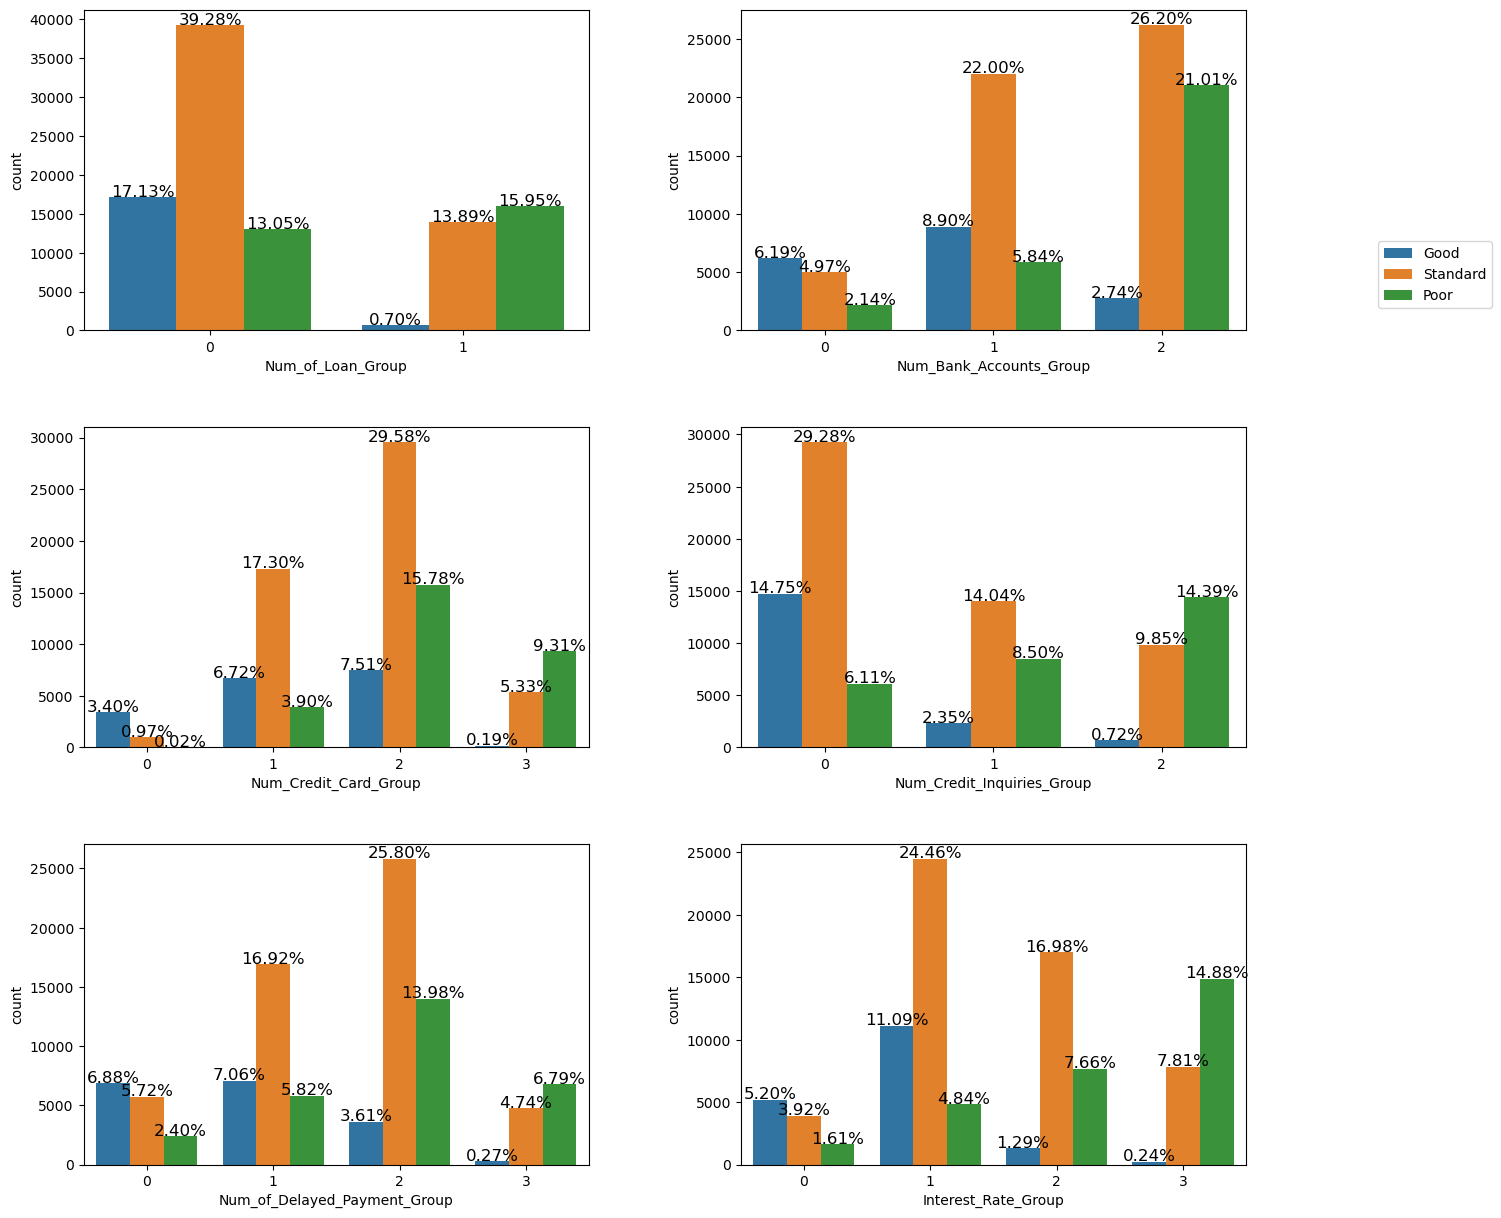

In [34]:
fig,axes = plt.subplots(3, 2, figsize=(15, 15))
sns.countplot(x='Num_of_Loan_Group',data=df,ax=axes[0,0],hue='Credit_Score')
percentage_without_hue(axes[0,0], df['Num_of_Loan_Group'], 0,80,12)
sns.countplot(x='Num_Bank_Accounts_Group',data=df,ax=axes[0,1],hue='Credit_Score')
percentage_without_hue(axes[0,1], df['Num_Bank_Accounts_Group'], 0,80,12)
sns.countplot(x='Num_Credit_Card_Group',data=df,ax=axes[1,0],hue='Credit_Score')
percentage_without_hue(axes[1,0], df['Num_Credit_Card_Group'], 0,80,12)
sns.countplot(x='Num_Credit_Inquiries_Group',data=df,ax=axes[1,1],hue='Credit_Score')
percentage_without_hue(axes[1,1], df['Num_Credit_Inquiries_Group'], 0,80,12)
sns.countplot(x='Num_of_Delayed_Payment_Group',data=df,ax=axes[2,0],hue='Credit_Score')
percentage_without_hue(axes[2,0], df['Num_of_Delayed_Payment_Group'], 0,80,12)
sns.countplot(x='Interest_Rate_Group',data=df,ax=axes[2,1],hue='Credit_Score')
percentage_without_hue(axes[2,1], df['Interest_Rate_Group'], 0,80,12)
axes[0,1].legend(bbox_to_anchor=(1.5, 0.3), loc='upper right')
axes[0,0].get_legend().remove()
axes[1,0].get_legend().remove()
axes[1,1].get_legend().remove()
axes[2,0].get_legend().remove()
axes[2,1].get_legend().remove()
plt.subplots_adjust(hspace=0.3)
plt.subplots_adjust(wspace=0.3)
plt.show()

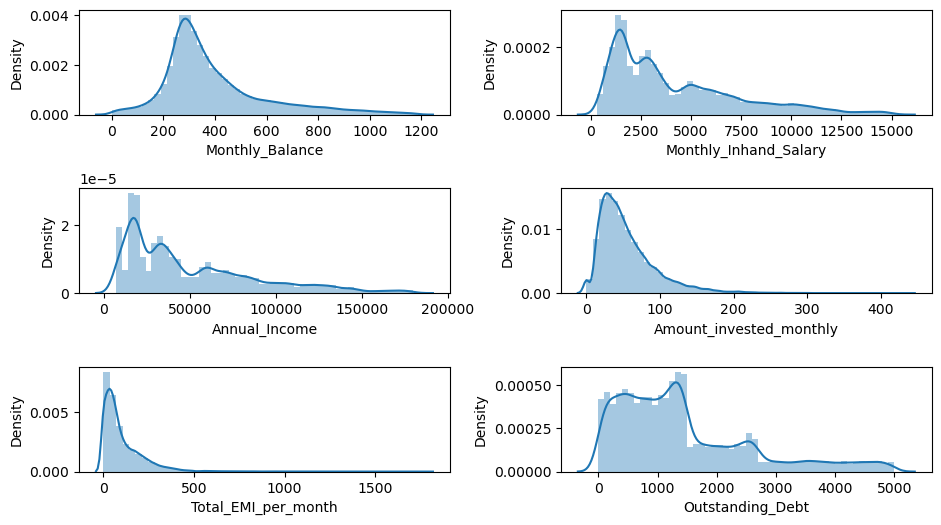

In [35]:
fig,axes = plt.subplots(3, 2, figsize=(11, 6))
sns.distplot(df["Monthly_Balance"], ax=axes[0,0])
sns.distplot(df["Monthly_Inhand_Salary"], ax=axes[0,1])
sns.distplot(df["Annual_Income"], ax=axes[1,0])
sns.distplot(df["Amount_invested_monthly"], ax=axes[1,1])
sns.distplot(df["Total_EMI_per_month"], ax=axes[2,0])
sns.distplot(df["Outstanding_Debt"], ax=axes[2,1])
plt.subplots_adjust(hspace=0.7)
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference : All the six distributions are right skewed / positive skewed distributions. i.e., Majority of customers earn and spend small amount of money. Also, EMI amount of majority of customers is zero. Number of customers with large amount of debt is also low.***

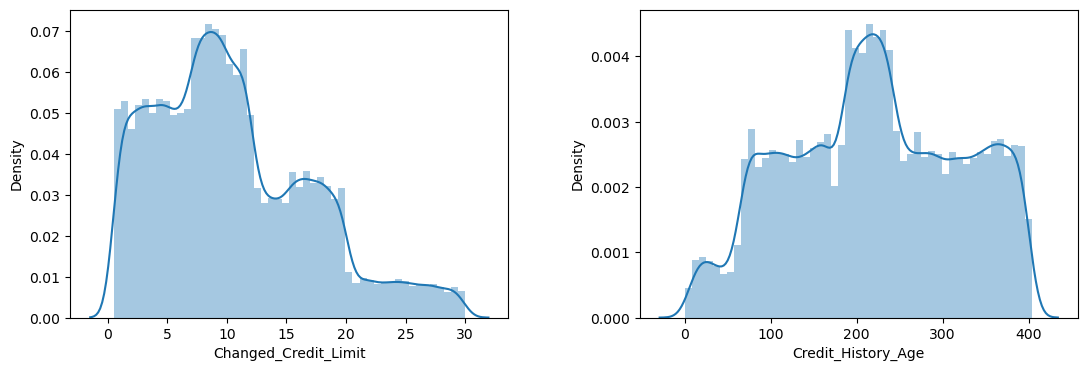

In [36]:
plt.figure(figsize=(13, 4))
plt.subplot(1,2,1)
sns.distplot(df["Changed_Credit_Limit"])
plt.subplot(1,2,2)
sns.distplot(df["Credit_History_Age"])
plt.subplots_adjust(wspace=0.3)
plt.show()

***Inference : Distribution of 'Changed_Credit_Limit' is moderately symmetric and 'Credit_History_Age' is approximately symmetric distribution.***

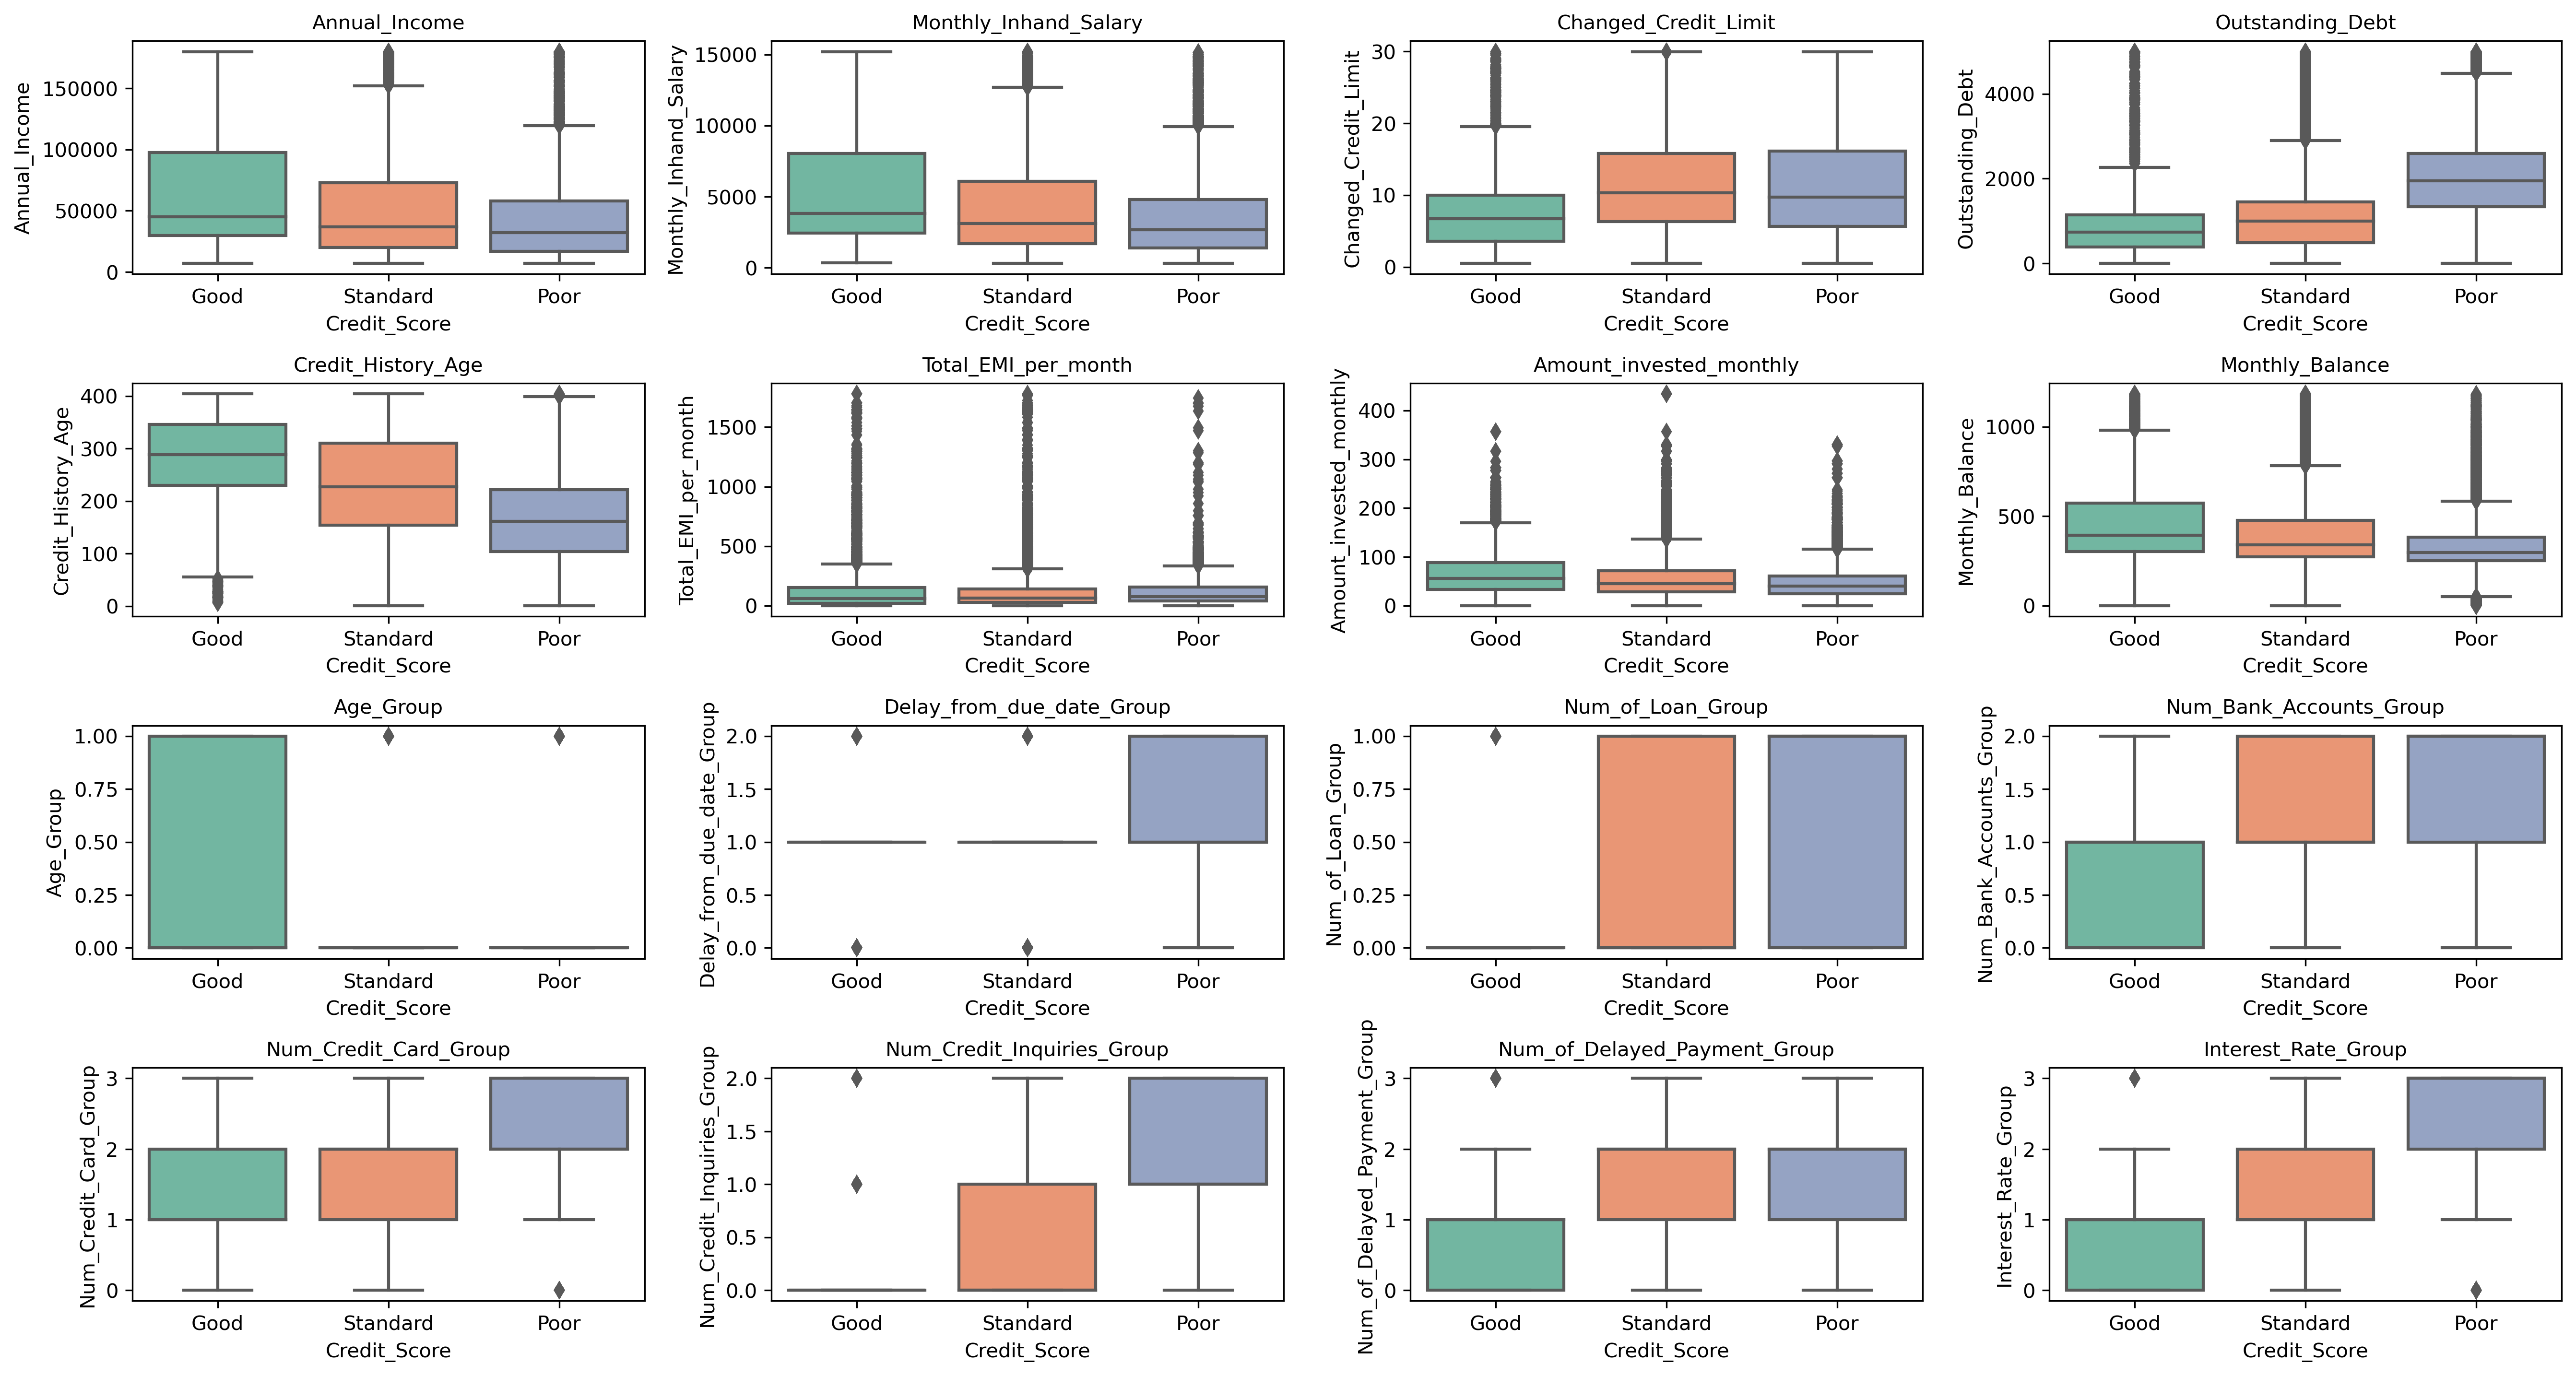

In [37]:
def make_boxplot(df, column, ax):
    sns.boxplot(x="Credit_Score", y=column, data=df, ax=ax, width=0.8, palette="Set2")
    plt.xticks(rotation=90)
    plt.title(column, fontdict={"fontsize": 10})
    plt.xticks(rotation=0)
plt.rc(("xtick", "ytick", "text"), c="k")
plt.rc("figure", dpi=80)
def plot_boxplot_num_cols(df):
    fig = plt.figure(figsize=(18, 14), dpi=300)
    numb_columns = df.select_dtypes(include="number").columns
    for column in numb_columns:
        ax = fig.add_subplot(6, 4, list(numb_columns).index(column)+1)
        make_boxplot(df, column, ax)
        plt.tight_layout(pad=0.3)
    plt.tight_layout()
    plt.show()
plot_boxplot_num_cols(df)

### Encoding

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 20 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Annual_Income                 100000 non-null  float64
 1   Monthly_Inhand_Salary         100000 non-null  float64
 2   Changed_Credit_Limit          100000 non-null  float64
 3   Credit_Mix                    100000 non-null  object 
 4   Outstanding_Debt              100000 non-null  float64
 5   Credit_History_Age            100000 non-null  float64
 6   Payment_of_Min_Amount         100000 non-null  object 
 7   Total_EMI_per_month           100000 non-null  float64
 8   Amount_invested_monthly       100000 non-null  float64
 9   Payment_Behaviour             100000 non-null  object 
 10  Monthly_Balance               100000 non-null  float64
 11  Credit_Score                  100000 non-null  object 
 12  Age_Group                     100000 non-null

***There are 4 categorical features. In order to convert them into numerical features, encoding should be done. Apply label encoding to target feature and apply one hot encoding to remaining features.***

In [39]:
le=LabelEncoder()
df['Credit_Score']=le.fit_transform(df['Credit_Score'])

In [40]:
df=df.join(pd.get_dummies(df['Credit_Mix'],prefix='Credit_Mix').astype(int))
df=df.join(pd.get_dummies(df['Payment_of_Min_Amount'],prefix='Payment_of_Min_Amount').astype(int))
df=df.join(pd.get_dummies(df['Payment_Behaviour'],prefix='Payment_Behaviour').astype(int))

In [41]:
df.drop(['Credit_Mix','Payment_of_Min_Amount','Payment_Behaviour'],axis=1,inplace=True)

## Correlation

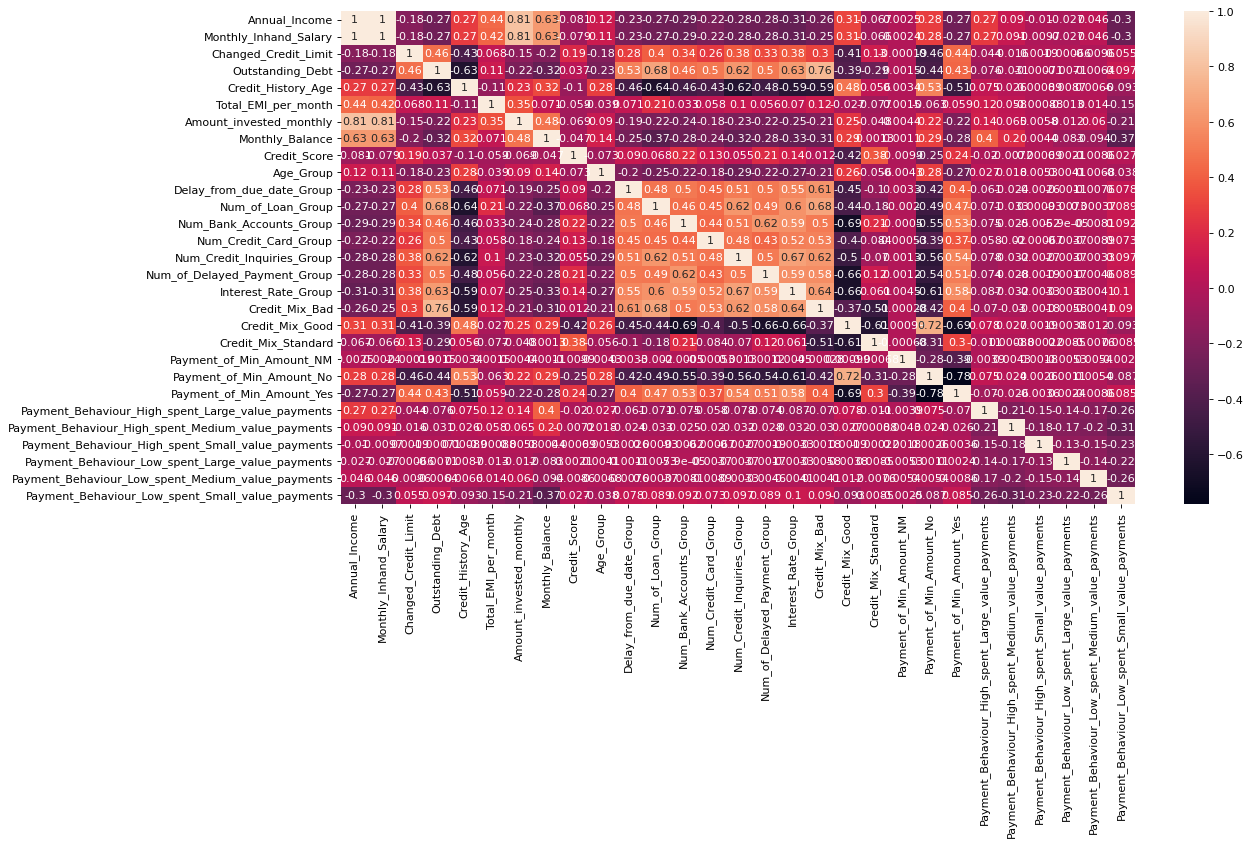

In [42]:
plt.figure(figsize=(16, 8))
sns.heatmap(df.corr(),annot=True)
plt.show()

***Inference : Features 'Annual_Income' and 'Monthly_Inhand_Salary' have correlation value 1. So we can drop any one among them (Both of them have the same correlation value with target variable).***

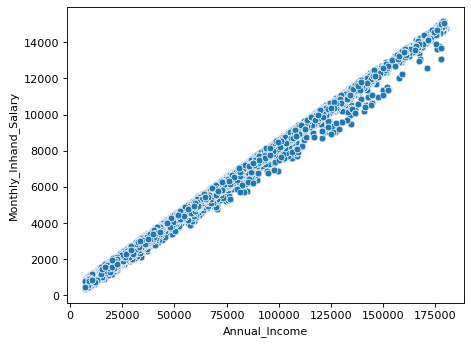

In [43]:
sns.scatterplot(x='Annual_Income',y='Monthly_Inhand_Salary',data=df)
plt.show()

***Inference : Features 'Annual_Income' and 'Monthly_Inhand_Salary' follows a positive linear relationship, as one increases other one also increases.***

In [44]:
df.drop('Monthly_Inhand_Salary',axis=1,inplace=True)

### Feature selection

***Mutual Information Score (MI Score)***

It will help to recognize the most valuable features for the prediction.

In [45]:
y = df['Credit_Score']
x = df.drop(columns=['Credit_Score'])
mi_scores = mutual_info_classif(x, y)
sorted_mi_scores = sorted(zip(x.columns, mi_scores), key=lambda x: x[1], reverse=True)
sorted_columns = [x[0] for x in sorted_mi_scores]
sorted_scores = [x[1] for x in sorted_mi_scores]
for i, score in enumerate(mi_scores):
    print(f"Feature '{x.columns[i]}': Mutual Information Score = {score}")

Feature 'Annual_Income': Mutual Information Score = 0.623773437164405
Feature 'Changed_Credit_Limit': Mutual Information Score = 0.1004218131041188
Feature 'Outstanding_Debt': Mutual Information Score = 0.6132708907054945
Feature 'Credit_History_Age': Mutual Information Score = 0.1026196400620154
Feature 'Total_EMI_per_month': Mutual Information Score = 0.5656114500063836
Feature 'Amount_invested_monthly': Mutual Information Score = 0.6183479578657118
Feature 'Monthly_Balance': Mutual Information Score = 0.03714053476371926
Feature 'Age_Group': Mutual Information Score = 0.019685129321696637
Feature 'Delay_from_due_date_Group': Mutual Information Score = 0.09262990226712509
Feature 'Num_of_Loan_Group': Mutual Information Score = 0.08227485550083502
Feature 'Num_Bank_Accounts_Group': Mutual Information Score = 0.09705341214761365
Feature 'Num_Credit_Card_Group': Mutual Information Score = 0.11053474671568075
Feature 'Num_Credit_Inquiries_Group': Mutual Information Score = 0.113235368553

***Select 8 features with high MI Score that contribute strongly for prediction.***

In [46]:
x_selected=df[['Annual_Income','Outstanding_Debt','Amount_invested_monthly','Total_EMI_per_month','Credit_Mix_Good','Interest_Rate_Group','Num_Credit_Card_Group','Num_Credit_Inquiries_Group']]

In [47]:
x=df.drop('Credit_Score',axis=1)
y=df['Credit_Score']
y=pd.DataFrame(y,columns=['Credit_Score'])

### Standard scaling x data

Do Standard Scaling in order to transform all numerical variables to have a similar scale, so that they can be compared more easily

In [48]:
sc=StandardScaler()
x_sc=sc.fit_transform(x)
x=pd.DataFrame(x_sc,columns=x.columns)
x_selected_sc=sc.fit_transform(x_selected)
x_selected=pd.DataFrame(x_selected_sc,columns=x_selected.columns)

# Modelling with Full Features

###  Data split

Divide the data into training, testing, and validation sets for model development in the ratio 80:10:10

In [49]:
x_rem,x_test,y_rem,y_test=train_test_split(x,y,test_size=0.1,stratify=y)

In [50]:
x_train,x_val,y_train,y_val=train_test_split(x_rem,y_rem,test_size=0.11111,stratify=y_rem)

### Balancing the train data with oversampling

Random oversampling is randomly duplicating examples in the minority class. Importantly, the change to the class distribution is only applied to the training data. The intent is to influence the fit of the models. The resampling is not applied to the test or validation data used to evaluate the performance of a model.

In [51]:
train= pd.concat([pd.DataFrame(x_train), pd.DataFrame(y_train)], axis=1)
sampler = RandomOverSampler()
x_train_balanced, y_train_balanced = sampler.fit_resample(x_train, y_train)
train_balanced = pd.concat([pd.DataFrame(x_train_balanced), pd.DataFrame(y_train_balanced)], axis=1)

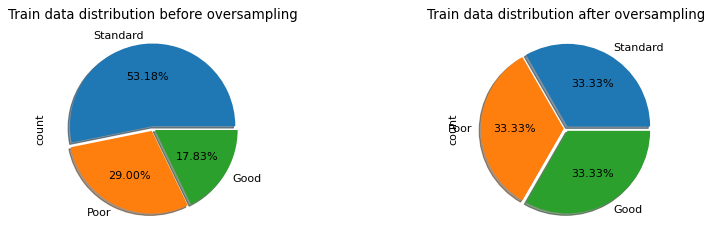

In [52]:
fig,axes = plt.subplots(1, 2,figsize=(10,10))
train_balanced["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],ax=axes[1])
axes[1].set_title('Train data distribution after oversampling')
train["Credit_Score"].value_counts().plot.pie(
    explode=[0.03, 0.03, 0.03],
    autopct="%1.2f%%",
    shadow=True,
    labels=["Standard", "Poor", "Good"],ax=axes[0])
axes[0].set_title('Train data distribution before oversampling')
plt.subplots_adjust(wspace=1)
plt.show()

***Now the train data got balanced.***

In [53]:
x_train.shape

(80000, 27)

In [54]:
x_train_balanced.shape

(127620, 27)

In [55]:
x_test.shape

(10000, 27)

In [56]:
x_val.shape

(10000, 27)

In [57]:
y_train.shape

(80000, 1)

In [58]:
y_train_balanced.shape

(127620, 1)

In [59]:
y_test.shape

(10000, 1)

In [60]:
y_val.shape

(10000, 1)

Build and train 3 classification models which are insensitive to outliers with default parameters (without hyper parameter tuning) using both train data and balanced train data, then predict using validation data.

### Decision Tree

In [61]:
dt_clf=DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_val)

In [62]:
dt_clf_b=dt_clf.fit(x_train_balanced,y_train_balanced)
dt_pred_balanced=dt_clf_b.predict(x_val)

### Random Forest

In [63]:
rf_clf=RandomForestClassifier()
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_val)

In [64]:
rf_clf_b=rf_clf.fit(x_train_balanced,y_train_balanced)
rf_pred_balanced=rf_clf_b.predict(x_val)

### Support Vector Machine (SVM)

In [65]:
svm_clf=SVC()
svm_clf.fit(x_train,y_train)
svm_pred=svm_clf.predict(x_val)

In [66]:
svm_clf_b=svm_clf.fit(x_train_balanced,y_train_balanced)
svm_pred_balanced=svm_clf_b.predict(x_val)

# Model Evaluation

Evaluate performance of models using various metrics

### With Oversampling

In [67]:
metric= pd.MultiIndex.from_product([['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']])
model=['Random Forest','Decision Tree','SVM']
comp_table= pd.DataFrame([[rf_clf_b.score(x_train_balanced,y_train_balanced),accuracy_score(y_val,rf_pred_balanced),precision_score(y_val,rf_pred_balanced,average='weighted'),recall_score(y_val,rf_pred_balanced,average='weighted'),f1_score(y_val,rf_pred_balanced,average='weighted')],
                          [dt_clf_b.score(x_train_balanced,y_train_balanced),accuracy_score(y_val,dt_pred_balanced),precision_score(y_val,dt_pred_balanced,average='weighted'),recall_score(y_val,dt_pred_balanced,average='weighted'),f1_score(y_val,dt_pred_balanced,average='weighted')],
                          [svm_clf_b.score(x_train_balanced,y_train_balanced),accuracy_score(y_val,svm_pred_balanced),precision_score(y_val,svm_pred_balanced,average='weighted'),recall_score(y_val,svm_pred_balanced,average='weighted'),f1_score(y_val,svm_pred_balanced,average='weighted')]],
                          columns=metric)
comp_table.index=model
comp_table

,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
Random Forest,0.999976,0.8080,0.811355,0.8080,0.808326
Decision Tree,1.000000,0.7428,0.742260,0.7428,0.742440
SVM,0.726132,0.6740,0.729978,0.6740,0.678926


***Random Forest and Decision Tree models are overfitted to train data. So in order to avoid overfitting, do hyper parameter tuning on those models.***

### Without Oversampling

In [68]:
metric= pd.MultiIndex.from_product([['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']])
model=['Random Forest','Decision Tree','SVM']
comp_table= pd.DataFrame([[rf_clf_b.score(x_train,y_train),accuracy_score(y_val,rf_pred),precision_score(y_val,rf_pred,average='weighted'),recall_score(y_val,rf_pred,average='weighted'),f1_score(y_val,rf_pred,average='weighted')],
                          [dt_clf_b.score(x_train,y_train),accuracy_score(y_val,dt_pred),precision_score(y_val,dt_pred,average='weighted'),recall_score(y_val,dt_pred,average='weighted'),f1_score(y_val,dt_pred,average='weighted')],
                          [svm_clf_b.score(x_train,y_train),accuracy_score(y_val,svm_pred),precision_score(y_val,svm_pred,average='weighted'),recall_score(y_val,svm_pred,average='weighted'),f1_score(y_val,svm_pred,average='weighted')]],
                          columns=metric)
comp_table.index=model
comp_table

,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
Random Forest,0.999962,0.8051,0.805289,0.8051,0.805085
Decision Tree,1.000000,0.7496,0.749361,0.7496,0.749456
SVM,0.676700,0.6960,0.709571,0.6960,0.695864


***Here also, Random Forest and Decision Tree models are overfitted to train data. There is no much difference in metric values from previous case. In SVM, validation accuracy is more than train accuracy. Hence the SVM model is said to have generalized well.***

## Hyper Parameter Tuning

### Random Forest

param_grid = { 'n_estimators': [10, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy'] }
CV_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid) 
CV_rfc.fit(x_train, y_train) 
best_params_random = CV_rfc.best_params_arams_
print(f"Best Parameters for imbalanced train data (Random Search): {best_params_random}")

CV_rfc.fit(x_train_balanced, y_train_balanced)
best_params_random = CV_rfc.best_params_
print(f"Best Parameters for imbalanced train data (Random Search): {best_params_random}")

***Now train the model Random Forest with best parameters obtained from hyper parameter tuning and evaluate the performance on validation data.***

In [69]:
rf_clf1=RandomForestClassifier(n_estimators=20,criterion='gini',max_features='sqrt',max_depth=15)
rf_clf1.fit(x_train, y_train)
rf_pred1=rf_clf1.predict(x_val)

In [70]:
rf_clf1_b=RandomForestClassifier(n_estimators=10,criterion='gini',max_features='sqrt',max_depth=15)
rf_clf1_b.fit(x_train_balanced, y_train_balanced)
rf_pred1_b=rf_clf1_b.predict(x_val)

### Decision Tree

param_dist = { 'max_leaf_nodes': [2, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy'] }
dtree_reg = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dtree_reg, param_distributions=param_dist, 
                                   n_iter=100, cv=5)
random_search.fit(x_train, y_train)
best_params_random = random_search.best_params_
print(f"Best Parameters for imbalanced train data (Random Search): {best_params_random}")

random_search.fit(x_train_balanced, y_train_balanced)
best_params_random = random_search.best_params_
print(f"Best Parameters for balanced train data (Random Search): {best_params_random}")

***Now train the model Decision Tree with best parameters obtained from hyper parameter tuning and evaluate the performance on validation data.***

In [71]:
dt_clf1=DecisionTreeClassifier(class_weight='balanced',criterion='gini',max_depth=15)
dt_clf1.fit(x_train, y_train)
dt_pred1=dt_clf1.predict(x_val)

In [72]:
dt_clf1_b=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=15)
dt_clf1_b.fit(x_train_balanced, y_train_balanced)
dt_pred1_b=dt_clf1_b.predict(x_val)

## Performance Evaluation

In [73]:
mux = pd.MultiIndex.from_product([['Without Oversampling','With Oversampling'],['Random Forest','DecisionTree']])
Metric=['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']
comp_table = pd.DataFrame([[rf_clf1.score(x_train,y_train),dt_clf1.score(x_train,y_train),
                            rf_clf1_b.score(x_train_balanced,y_train_balanced),dt_clf1_b.score(x_train_balanced,y_train_balanced)],
                            [accuracy_score(y_val,rf_pred1),accuracy_score(y_val,dt_pred1),
                            accuracy_score(y_val,rf_pred1_b),accuracy_score(y_val,dt_pred1_b)],
                            [precision_score(y_val,rf_pred1,average='weighted'),precision_score(y_val,dt_pred1,average='weighted'),
                            precision_score(y_val,rf_pred1_b,average='weighted'),precision_score(y_val,dt_pred1_b,average='weighted')],
                            [recall_score(y_val,rf_pred1,average='weighted'),recall_score(y_val,dt_pred1,average='weighted'),
                            recall_score(y_val,rf_pred1_b,average='weighted'),recall_score(y_val,dt_pred1_b,average='weighted')],
                            [f1_score(y_val,rf_pred1,average='weighted'),f1_score(y_val,dt_pred1,average='weighted'),
                            f1_score(y_val,rf_pred1_b,average='weighted'),f1_score(y_val,dt_pred1_b,average='weighted')]],columns=mux)
comp_table.index=Metric
comp_table

Without Oversampling              With Oversampling  \
                           Random Forest DecisionTree     Random Forest   
Train Accuracy                  0.811712     0.759925          0.795722   
Validation Accuracy             0.745500     0.707500          0.704800   
Precision                       0.749241     0.745661          0.751030   
Recall                          0.745500     0.707500          0.704800   
F1 Score                        0.745664     0.711059          0.710357   

                                  
                    DecisionTree  
Train Accuracy          0.799788  
Validation Accuracy     0.695300  
Precision               0.733871  
Recall                  0.695300  
F1 Score                0.699979

***Overfitting got reduced. We can also check performance by the use of Hard Voting Classifier.***

### Hard Voting Classifier

In [74]:
voting_clf_hard = VotingClassifier(estimators=[('a1',rf_clf1),('a2',dt_clf1)],voting='hard')
voting_clf_hard.fit(x_train, y_train)
pred = voting_clf_hard.predict(x_val)

In [75]:
metric=['Train Accuracy','Validaion Accuracy','Precision','Recall','F1 Score']
models=['Random Forest','Decision Tree','Hard Voting Classifier']
table= pd.DataFrame([[rf_clf1.score(x_train, y_train),dt_clf1.score(x_train, y_train),voting_clf_hard.score(x_train, y_train)],[accuracy_score(y_val,rf_pred),accuracy_score(y_val,dt_pred),accuracy_score(y_val,pred)],[precision_score(y_val,rf_pred,average='weighted'),precision_score(y_val,dt_pred,average='weighted'),precision_score(y_val,pred,average='weighted')],[recall_score(y_val,rf_pred,average='weighted'),recall_score(y_val,dt_pred,average='weighted'),recall_score(y_val,pred,average='weighted')],[f1_score(y_val,rf_pred,average='weighted'),f1_score(y_val,dt_pred,average='weighted'),f1_score(y_val,pred,average='weighted')]],columns=models)
table.index=metric
table

,Random Forest,Decision Tree,Hard Voting Classifier
Train Accuracy,0.811712,0.759925,0.748112
Validaion Accuracy,0.805100,0.749600,0.705400
Precision,0.805289,0.749361,0.757553
Recall,0.805100,0.749600,0.705400
F1 Score,0.805085,0.749456,0.709549


***There is no improvement in metric values using Hard Voting Classifier.***

# Modelling with Selected Features

###  Data split

In [76]:
x_rem,x_test,y_rem,y_test=train_test_split(x_selected,y,test_size=0.1,stratify=y)

In [77]:
x_train,x_val,y_train,y_val=train_test_split(x_rem,y_rem,test_size=0.11111,stratify=y_rem)

### Balancing the train data with oversampling

In [78]:
x_train_balanced, y_train_balanced = sampler.fit_resample(x_train, y_train)

### Decision Tree

In [79]:
dt_clf.fit(x_train,y_train)
dt_pred=dt_clf.predict(x_val)

In [80]:
dt_clf_b=dt_clf.fit(x_train_balanced,y_train_balanced)
dt_pred_balanced=dt_clf_b.predict(x_val)

### Random Forest

In [81]:
rf_clf.fit(x_train,y_train)
rf_pred=rf_clf.predict(x_val)

In [82]:
rf_clf_b=rf_clf.fit(x_train_balanced,y_train_balanced)
rf_pred_balanced=rf_clf_b.predict(x_val)

### Support Vector Machine (SVM)

In [83]:
svm_clf.fit(x_train,y_train)
svm_pred=svm_clf.predict(x_val)

In [84]:
svm_clf_b=svm_clf.fit(x_train_balanced,y_train_balanced)
svm_pred_balanced=svm_clf_b.predict(x_val)

## Model Evaluation

### With Oversampling

In [85]:
metric= pd.MultiIndex.from_product([['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']])
model=['Random Forest','Decision Tree','SVM']
comp_table= pd.DataFrame([[rf_clf_b.score(x_train_balanced,y_train_balanced),accuracy_score(y_val,rf_pred_balanced),precision_score(y_val,rf_pred_balanced,average='weighted'),recall_score(y_val,rf_pred_balanced,average='weighted'),f1_score(y_val,rf_pred_balanced,average='weighted')],
                          [dt_clf_b.score(x_train_balanced,y_train_balanced),accuracy_score(y_val,dt_pred_balanced),precision_score(y_val,dt_pred_balanced,average='weighted'),recall_score(y_val,dt_pred_balanced,average='weighted'),f1_score(y_val,dt_pred_balanced,average='weighted')],
                          [svm_clf_b.score(x_train_balanced,y_train_balanced),accuracy_score(y_val,svm_pred_balanced),precision_score(y_val,svm_pred_balanced,average='weighted'),recall_score(y_val,svm_pred_balanced,average='weighted'),f1_score(y_val,svm_pred_balanced,average='weighted')]],
                          columns=metric)
comp_table.index=model
comp_table

,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
Random Forest,0.892446,0.8031,0.821228,0.8031,0.802333
Decision Tree,0.892446,0.8028,0.825316,0.8028,0.801568
SVM,0.720812,0.6701,0.729123,0.6701,0.674620


***Random Forest and Decision Tree models are overfitted to train data. So in order to avoid overfitting, do hyper parameter tuning on those models.***

### Without Oversampling

In [86]:
metric= pd.MultiIndex.from_product([['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']])
model=['Random Forest','Decision Tree','SVM']
comp_table= pd.DataFrame([[rf_clf_b.score(x_train,y_train),accuracy_score(y_val,rf_pred),precision_score(y_val,rf_pred,average='weighted'),recall_score(y_val,rf_pred,average='weighted'),f1_score(y_val,rf_pred,average='weighted')],
                          [dt_clf_b.score(x_train,y_train),accuracy_score(y_val,dt_pred),precision_score(y_val,dt_pred,average='weighted'),recall_score(y_val,dt_pred,average='weighted'),f1_score(y_val,dt_pred,average='weighted')],
                          [svm_clf_b.score(x_train,y_train),accuracy_score(y_val,svm_pred),precision_score(y_val,svm_pred,average='weighted'),recall_score(y_val,svm_pred,average='weighted'),f1_score(y_val,svm_pred,average='weighted')]],
                          columns=metric)
comp_table.index=model
comp_table

,Train Accuracy,Validation Accuracy,Precision,Recall,F1 Score
Random Forest,0.843225,0.8134,0.815121,0.8134,0.813561
Decision Tree,0.839525,0.8162,0.822032,0.8162,0.816236
SVM,0.670800,0.6766,0.697256,0.6766,0.680821


***All the three models are not overfitted to train data and also metric values got improved. In SVM, validation accuracy is more than train accuracy. Hence the SVM model is said to have generalized well.***

## Hyper Parameter Tuning

### Random Forest

param_grid = { 'n_estimators': [10, 20], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy'] }
CV_rfc = GridSearchCV(estimator=rf_clf, param_grid=param_grid) 
CV_rfc.fit(x_train, y_train) 
best_params_random = CV_rfc.best_params_arams_
print(f"Best Parameters for imbalanced train data (Random Search): {best_params_random}")

CV_rfc.fit(x_train_balanced, y_train_balanced)
best_params_random = CV_rfc.best_params_
print(f"Best Parameters for imbalanced train data (Random Search): {best_params_random}")

In [87]:
rf_clf1=RandomForestClassifier(n_estimators=10,criterion='entropy',max_features='auto')
rf_clf1.fit(x_train, y_train)
rf_pred1=rf_clf1.predict(x_val)

In [88]:
rf_clf1_b=RandomForestClassifier(n_estimators=10,criterion='gini',max_features='sqrt')
rf_clf1_b.fit(x_train_balanced, y_train_balanced)
rf_pred1_b=rf_clf1_b.predict(x_val)

### Decision Tree

param_dist = { 'max_leaf_nodes': [2, 5, 7, 9], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth' : [4,5,6,7,8], 'criterion' :['gini', 'entropy'] }
dtree_reg = DecisionTreeClassifier()
random_search = RandomizedSearchCV(dtree_reg, param_distributions=param_dist, 
                                   n_iter=100, cv=5)
random_search.fit(x_train, y_train)
best_params_random = random_search.best_params_
print(f"Best Parameters for imbalanced train data (Random Search): {best_params_random}")

random_search.fit(x_train_balanced, y_train_balanced)
best_params_random = random_search.best_params_
print(f"Best Parameters for balanced train data (Random Search): {best_params_random}")

In [89]:
dt_clf1=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=200)
dt_clf1.fit(x_train, y_train)
dt_pred1=dt_clf1.predict(x_val)

In [90]:
dt_clf1_b=DecisionTreeClassifier(class_weight='balanced',criterion='entropy')
dt_clf1_b.fit(x_train_balanced, y_train_balanced)
dt_pred1_b=dt_clf1_b.predict(x_val)

## Performance Evaluation

In [91]:
mux = pd.MultiIndex.from_product([['Without Oversampling','With Oversampling'],['Random Forest','DecisionTree']])
Metric=['Train Accuracy','Validation Accuracy','Precision','Recall','F1 Score']
comp_table = pd.DataFrame([[rf_clf1.score(x_train,y_train),dt_clf1.score(x_train,y_train),
                            rf_clf1_b.score(x_train_balanced,y_train_balanced),dt_clf1_b.score(x_train_balanced,y_train_balanced)],
                            [accuracy_score(y_val,rf_pred1),accuracy_score(y_val,dt_pred1),
                            accuracy_score(y_val,rf_pred1_b),accuracy_score(y_val,dt_pred1_b)],
                            [precision_score(y_val,rf_pred1,average='weighted'),precision_score(y_val,dt_pred1,average='weighted'),
                            precision_score(y_val,rf_pred1_b,average='weighted'),precision_score(y_val,dt_pred1_b,average='weighted')],
                            [recall_score(y_val,rf_pred1,average='weighted'),recall_score(y_val,dt_pred1,average='weighted'),
                            recall_score(y_val,rf_pred1_b,average='weighted'),recall_score(y_val,dt_pred1_b,average='weighted')],
                            [f1_score(y_val,rf_pred1,average='weighted'),f1_score(y_val,dt_pred1,average='weighted'),
                            f1_score(y_val,rf_pred1_b,average='weighted'),f1_score(y_val,dt_pred1_b,average='weighted')]],columns=mux)
comp_table.index=Metric
comp_table

Without Oversampling              With Oversampling  \
                           Random Forest DecisionTree     Random Forest   
Train Accuracy                  0.859075     0.846413          0.891396   
Validation Accuracy             0.808100     0.804000          0.802500   
Precision                       0.809725     0.822700          0.819618   
Recall                          0.808100     0.804000          0.802500   
F1 Score                        0.808267     0.803270          0.801886   

                                  
                    DecisionTree  
Train Accuracy          0.892446  
Validation Accuracy     0.803000  
Precision               0.825780  
Recall                  0.803000  
F1 Score                0.801804

***There is a slight decrease in metric values from previous case. We can also check performance by the use of Hard Voting Classifier.***

### Hard Voting Classifier

In [92]:
voting_clf_hard = VotingClassifier(estimators=[('a1',rf_clf1),('a2',dt_clf1)],voting='hard')
voting_clf_hard.fit(x_train, y_train)
pred = voting_clf_hard.predict(x_val)

In [93]:
metric=['Train Accuracy','Validaion Accuracy','Precision','Recall','F1 Score']
models=['Random Forest','Decision Tree','Hard Voting Classifier']
table= pd.DataFrame([[rf_clf1.score(x_train, y_train),dt_clf1.score(x_train, y_train),voting_clf_hard.score(x_train, y_train)],[accuracy_score(y_val,rf_pred),accuracy_score(y_val,dt_pred),accuracy_score(y_val,pred)],[precision_score(y_val,rf_pred,average='weighted'),precision_score(y_val,dt_pred,average='weighted'),precision_score(y_val,pred,average='weighted')],[recall_score(y_val,rf_pred,average='weighted'),recall_score(y_val,dt_pred,average='weighted'),recall_score(y_val,pred,average='weighted')],[f1_score(y_val,rf_pred,average='weighted'),f1_score(y_val,dt_pred,average='weighted'),f1_score(y_val,pred,average='weighted')]],columns=models)
table.index=metric
table

,Random Forest,Decision Tree,Hard Voting Classifier
Train Accuracy,0.859075,0.846413,0.846225
Validaion Accuracy,0.813400,0.816200,0.803800
Precision,0.815121,0.822032,0.823186
Recall,0.813400,0.816200,0.803800
F1 Score,0.813561,0.816236,0.803069


***There is no improvement in metric values using Hard Voting Classifier.***

***Metric values improved when we do modelling with selected features compared to modelling with full features. So use the selected features only for training and predict test data using best model obtained - Decision Tree with default parameters without oversampling.***